# Phase 2 Project
* Student name: ROBERT KIDAKE KALAFA
* Instructor name: WINNIE ANYOSO, SAMUEL G. MWANGI and SAMUEL KARU



# Overview
This project aims to analyze house sales in King County, Washington, utilizing regression modeling techniques to predict house prices. It involves selecting relevant features from the dataset, addressing ambiguities in column descriptions, and building robust predictive models. The goal is to provide stakeholders with actionable insights into the King County housing market through effective forecasting of house prices.

# Business Problem
Serenity Realty Agency is seeking assistance in identifying the primary factors that impact local house prices, using this knowledge to inform our pricing strategies. This project aims to create an optimal model that guides our pricing decisions, ultimately enhancing our annual sales performance.

# Project Objectives
1. Identify critical factors that strongly impact house prices in King county.
2. Formulate an effective pricing strategy using a robust multiple linear regression model.
3. Evaluate house pricing accuracy by comparing predicted and actual prices to pinpoint overvalued or undervalued       properties.
4. Enhance the agency's annual revenue by leveraging analytical insights and the pricing strategy developed through this initiative.

# Data Understanding
Exploring the data to get a glimpse of:
1. Shape of the data
2. The column names
3. The data types
4. Statistical summary of the data
5. The null values
6. The duplicates

In [577]:
# Import the relevant Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [578]:
# Specify the full path to the CSV file
file_path = r'C:\Users\rkalafa\Desktop\DSF-PT07\DSF-PT07 Phase 2 Group Project\DSF-PT07-Phase-2-Project\data\kc_house_data.csv'
# Load the dataset
data = pd.read_csv(file_path)
# Display a sample of the dataset to verify it loaded correctly
print(data.head())

           id        date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014 221900         3          1         1180      5650   
1  6414100192   12/9/2014 538000         3       2.25         2570      7242   
2  5631500400   2/25/2015 180000         2          1          770     10000   
3  2487200875   12/9/2014 604000         4          3         1960      5000   
4  1954400510   2/18/2015 510000         3          2         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement yr_built  \
0       1         NaN     0  ...      7        1180            0.0     1955   
1       2           0     0  ...      7        2170          400.0     1951   
2       1           0     0  ...      6         770            0.0     1933   
3       1           0     0  ...      7        1050          910.0     1965   
4       1           0     0  ...      8        1680            0.0     1987   

   yr_renovated  zipcode   lat    long  sqft

In [579]:
# Understanding DataFrame Size
# Total number of rows and columns.
print("The number of rows is", data.shape[0])
print('The number of columns is', data.shape[1])

The number of rows is 21597
The number of columns is 21


In [580]:
# Understanding the structure of the dataset, including column names, data types, and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [581]:
# A view of the columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [582]:
# A statistical summary of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597,21597,21597,21597,21597,21597,19221,21534,21597,21597,21597,21597,17755,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,1000102,78000,1,0.50,370,520,1,0,0,1,3,370,1900,0,98001,47.16,-122.52,399,651
25%,2123049175,322000,3,1.75,1430,5040,1,0,0,3,7,1190,1951,0,98033,47.47,-122.33,1490,5100
50%,3904930410,450000,3,2.25,1910,7618,1.50,0,0,3,7,1560,1975,0,98065,47.57,-122.23,1840,7620
75%,7308900490,645000,4,2.50,2550,10685,2,0,0,4,8,2210,1997,0,98118,47.68,-122.12,2360,10083
max,9900000190,7700000,33,8,13540,1651359,3.50,1,4,5,13,9410,2015,2015,98199,47.78,-121.31,6210,871200


In [583]:
# Checking for missing values in our data set
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [584]:
# Calculating the percentage of missing values in each column
missing_percentage = (data.isna().sum() / len(data)) * 100
print(missing_percentage)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront      11.00
view             0.29
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated    17.79
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: float64


In [585]:
# Checking for duplicates
data.duplicated().sum()

0

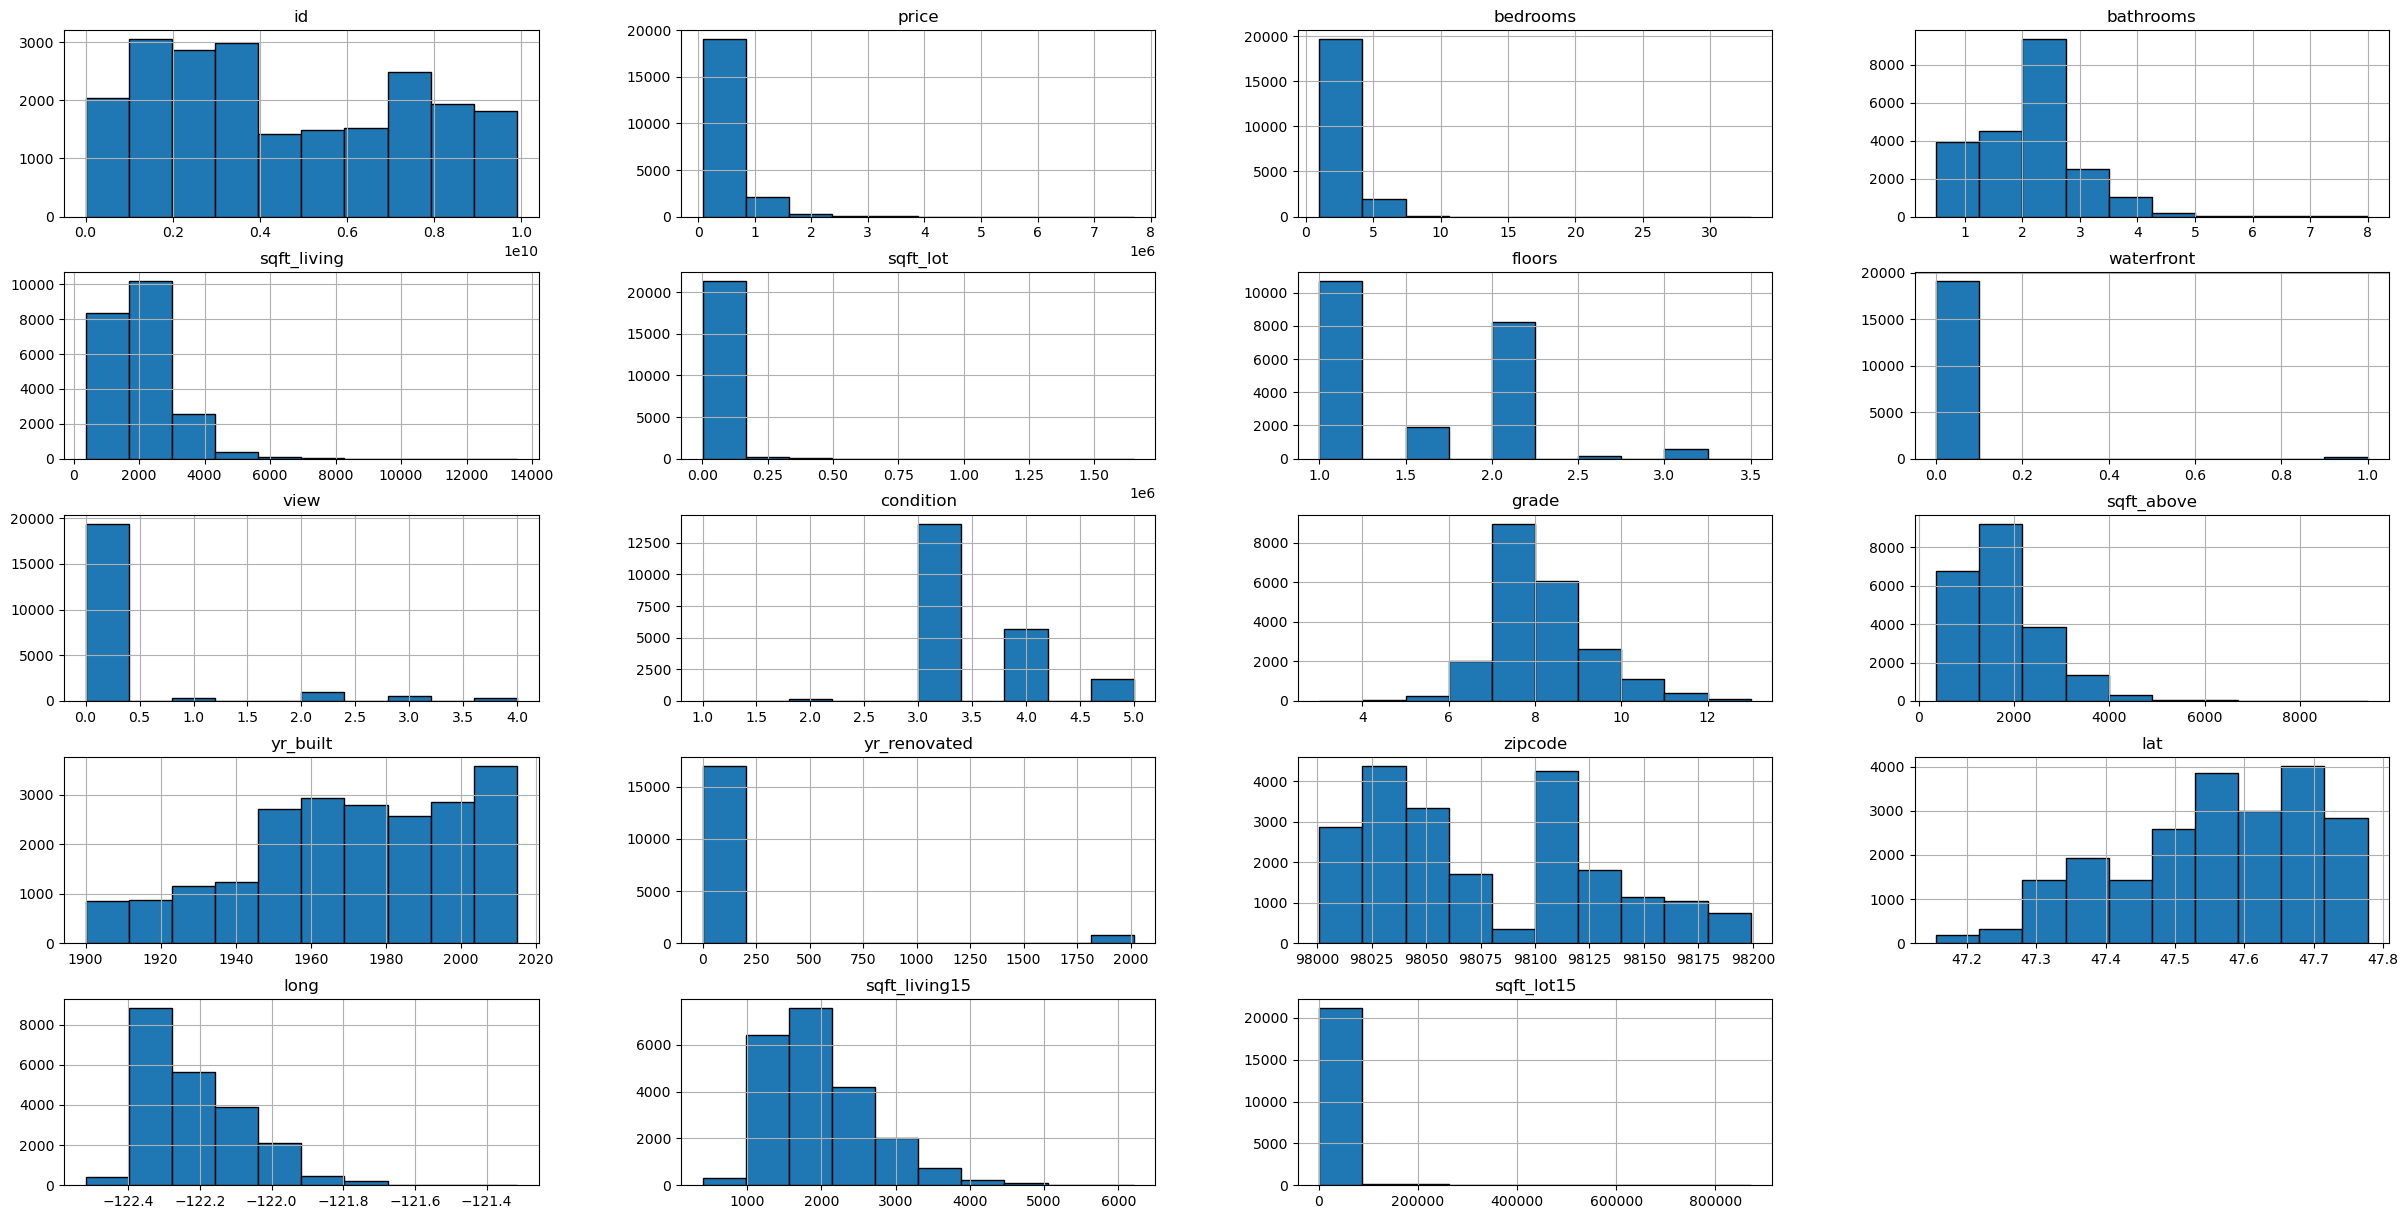

In [586]:
# PLOT DATA HISTOGRAM to get an overview of the distribution
data.hist(figsize=(30,15), edgecolor = 'black');

# Data Description Report
The dataset comprises 21 columns and 21,597 rows, indicating 21 different variables each with 21,597 records.
It encompasses three primary data types: float, integer, and object.
Specifically, three columns contain missing values:

1. The waterfront column has 2376 missing values, approximately 11% of the dataset.
2. The view column has 63 missing values, around 0.3% of the dataset.
3. The yr_renovated column has 3842 missing values, roughly 18% of the dataset.
There are no duplicate rows present in this dataset.
To gain insights into the distribution, central tendency, and spread of our numerical data, histograms were employed as a visualization tool.

# Data Cleaning
Dropping missing values: Since all three columns with null values were below 20%, we opted to remove rows containing missing values, ensuring minimal impact on the dataset.

Converting data types:
1. Transformed the 'grade' column from object type to integer, generating a new column named 'numerical_grade' through splitting.
2. Changed the 'waterfront' column from object type to integer.
3. Converted the 'date' column to integer type by applying a lambda function, and subsequently derived a new 'year' column using the pd.DatetimeIndex function to capture only the year component.

Lastly, created a subset of the main dataset containing selected features to facilitate further analysis.

In [587]:
#Dropping the missing values in waterfront, yr_renovated and view columns
data.dropna(subset = ["waterfront"], inplace = True)
data.dropna(subset = ["yr_renovated"], inplace = True)
data.dropna(subset = ["view"], inplace = True)

In [588]:
# Rechecking for missing values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [589]:
# Reindexing after dropping and removing the missing values
data.reset_index(drop=True, inplace=True)
#Checking for the columns of the dataframe
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [590]:
print(data.columns)



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [591]:
# Exclude non-numeric columns from correlation computation and checking correlation against price to determine the features to use in our analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_columns].corr()['price'].sort_values(ascending=False)

print(correlations)


price               1
sqft_living      0.71
grade            0.66
sqft_above       0.61
sqft_living15    0.58
bathrooms        0.53
view             0.40
lat              0.31
bedrooms         0.31
waterfront       0.27
floors           0.26
yr_renovated     0.12
sqft_lot         0.08
sqft_lot15       0.08
yr_built         0.05
condition        0.03
long             0.02
id              -0.02
zipcode         -0.05
Name: price, dtype: float64


In [592]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [593]:
# Display the updated DataFrame
print(data)

               id        date   price  bedrooms  bathrooms  sqft_living  \
0      6414100192   12/9/2014  538000         3       2.25         2570   
1      2487200875   12/9/2014  604000         4          3         1960   
2      1954400510   2/18/2015  510000         3          2         1680   
3      7237550310   5/12/2014 1230000         4       4.50         5420   
4      1321400060   6/27/2014  257500         3       2.25         1715   
...           ...         ...     ...       ...        ...          ...   
15757  2997800021   2/19/2015  475000         3       2.50         1310   
15758   263000018   5/21/2014  360000         3       2.50         1530   
15759  6600060120   2/23/2015  400000         4       2.50         2310   
15760  1523300141   6/23/2014  402101         2       0.75         1020   
15761  1523300157  10/15/2014  325000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          7242       2       

In [594]:
# A copy of the data frame with the features that we are working with
data_subset = data[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living',  'waterfront','sqft_above','sqft_living15',"floors",'zipcode','date']].copy()
data_subset

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,floors,zipcode,date
0,538000,3,2.25,2570,0,2170,1690,2,98125,12/9/2014
1,604000,4,3,1960,0,1050,1360,1,98136,12/9/2014
2,510000,3,2,1680,0,1680,1800,1,98074,2/18/2015
3,1230000,4,4.50,5420,0,3890,4760,1,98053,5/12/2014
4,257500,3,2.25,1715,0,1715,2238,2,98003,6/27/2014
...,...,...,...,...,...,...,...,...,...,...
15757,475000,3,2.50,1310,0,1180,1330,2,98116,2/19/2015
15758,360000,3,2.50,1530,0,1530,1530,3,98103,5/21/2014
15759,400000,4,2.50,2310,0,2310,1830,2,98146,2/23/2015
15760,402101,2,0.75,1020,0,1020,1020,2,98144,6/23/2014


In [595]:
#Setting Custom Display Format
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data_subset['year'] = pd.DatetimeIndex(data_subset['date']).year
data_subset.drop("date",axis = 1,inplace =True)

In [596]:
data_subset.corr()['price']

price               1
bedrooms         0.31
bathrooms        0.53
sqft_living      0.71
waterfront       0.27
sqft_above       0.61
sqft_living15    0.58
floors           0.26
zipcode         -0.05
year             0.00
Name: price, dtype: float64

# Exploratory Data Analysis


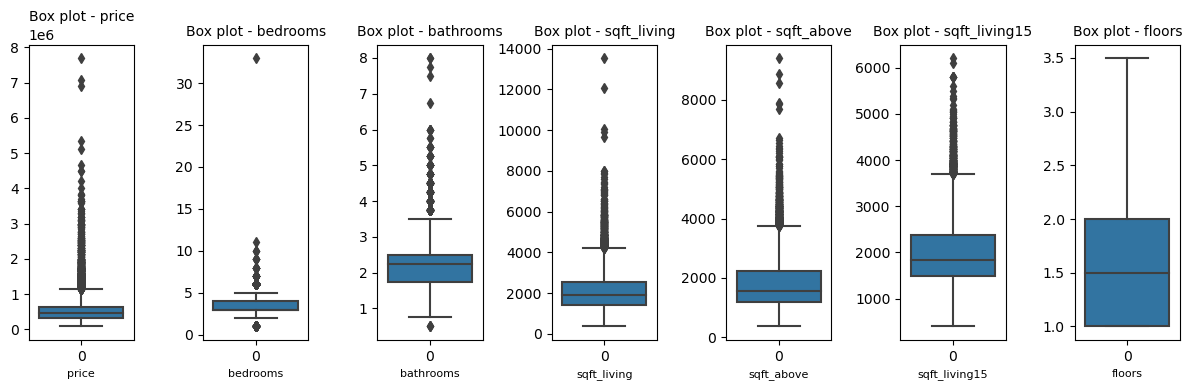

In [597]:
# Plotting box plots to check wether we have outliers in the data set
#Columns for our box plots
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Generate box plots for each column
for i, column in enumerate(columns):
    sns.boxplot(data=data_subset[column], ax=axes[i])
    axes[i].set_title(f'Box plot - {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In [598]:
# Statistical view to confirm the outliers plotted above
#df.describe()
min_max_summary = data_subset.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,floors,zipcode,year
min,82000,1,0.50,370,0,370,399,1,98001,2014
max,7700000,33,8,13540,1,9410,6210,3.50,98199,2015


In [599]:
# Defining function to remove outliers from the subset
def remove_outliers(data_subset):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors']
    
    for variable in variables:
        data_subset= data_subset[np.abs(data_subset[variable]-data_subset[variable].mean()) <= (3*data_subset[variable].std())]
        
    return data_subset
#Removing the outliers which have a standard deviation greater than 3
data_subset = remove_outliers(data_subset)

In [600]:
# Statistical view to recheck for outliers after cleaning
#data_subset.describe()
min_max_summary = data_subset.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,waterfront,sqft_above,sqft_living15,floors,zipcode,year
min,82000,1,0.50,370,0,370,399,1,98001,2014
max,1650000,6,4.25,4450,1,3890,3760,3,98199,2015


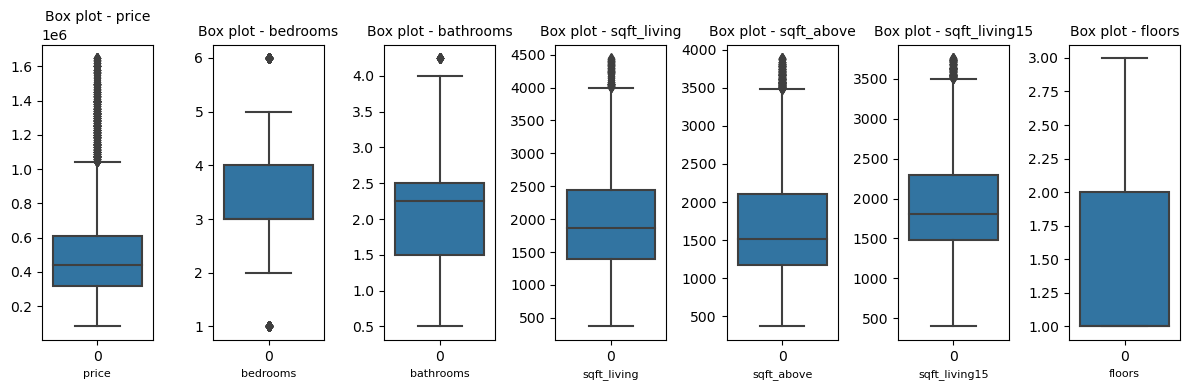

In [601]:
# Plotting to recheck for outliers in the dataset after cleaning
# Define the columns for box plots
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Generate box plots for each column
for i, column in enumerate(columns):
    sns.boxplot(data= data_subset[column], ax=axes[i])
    axes[i].set_title(f'Box plot - {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

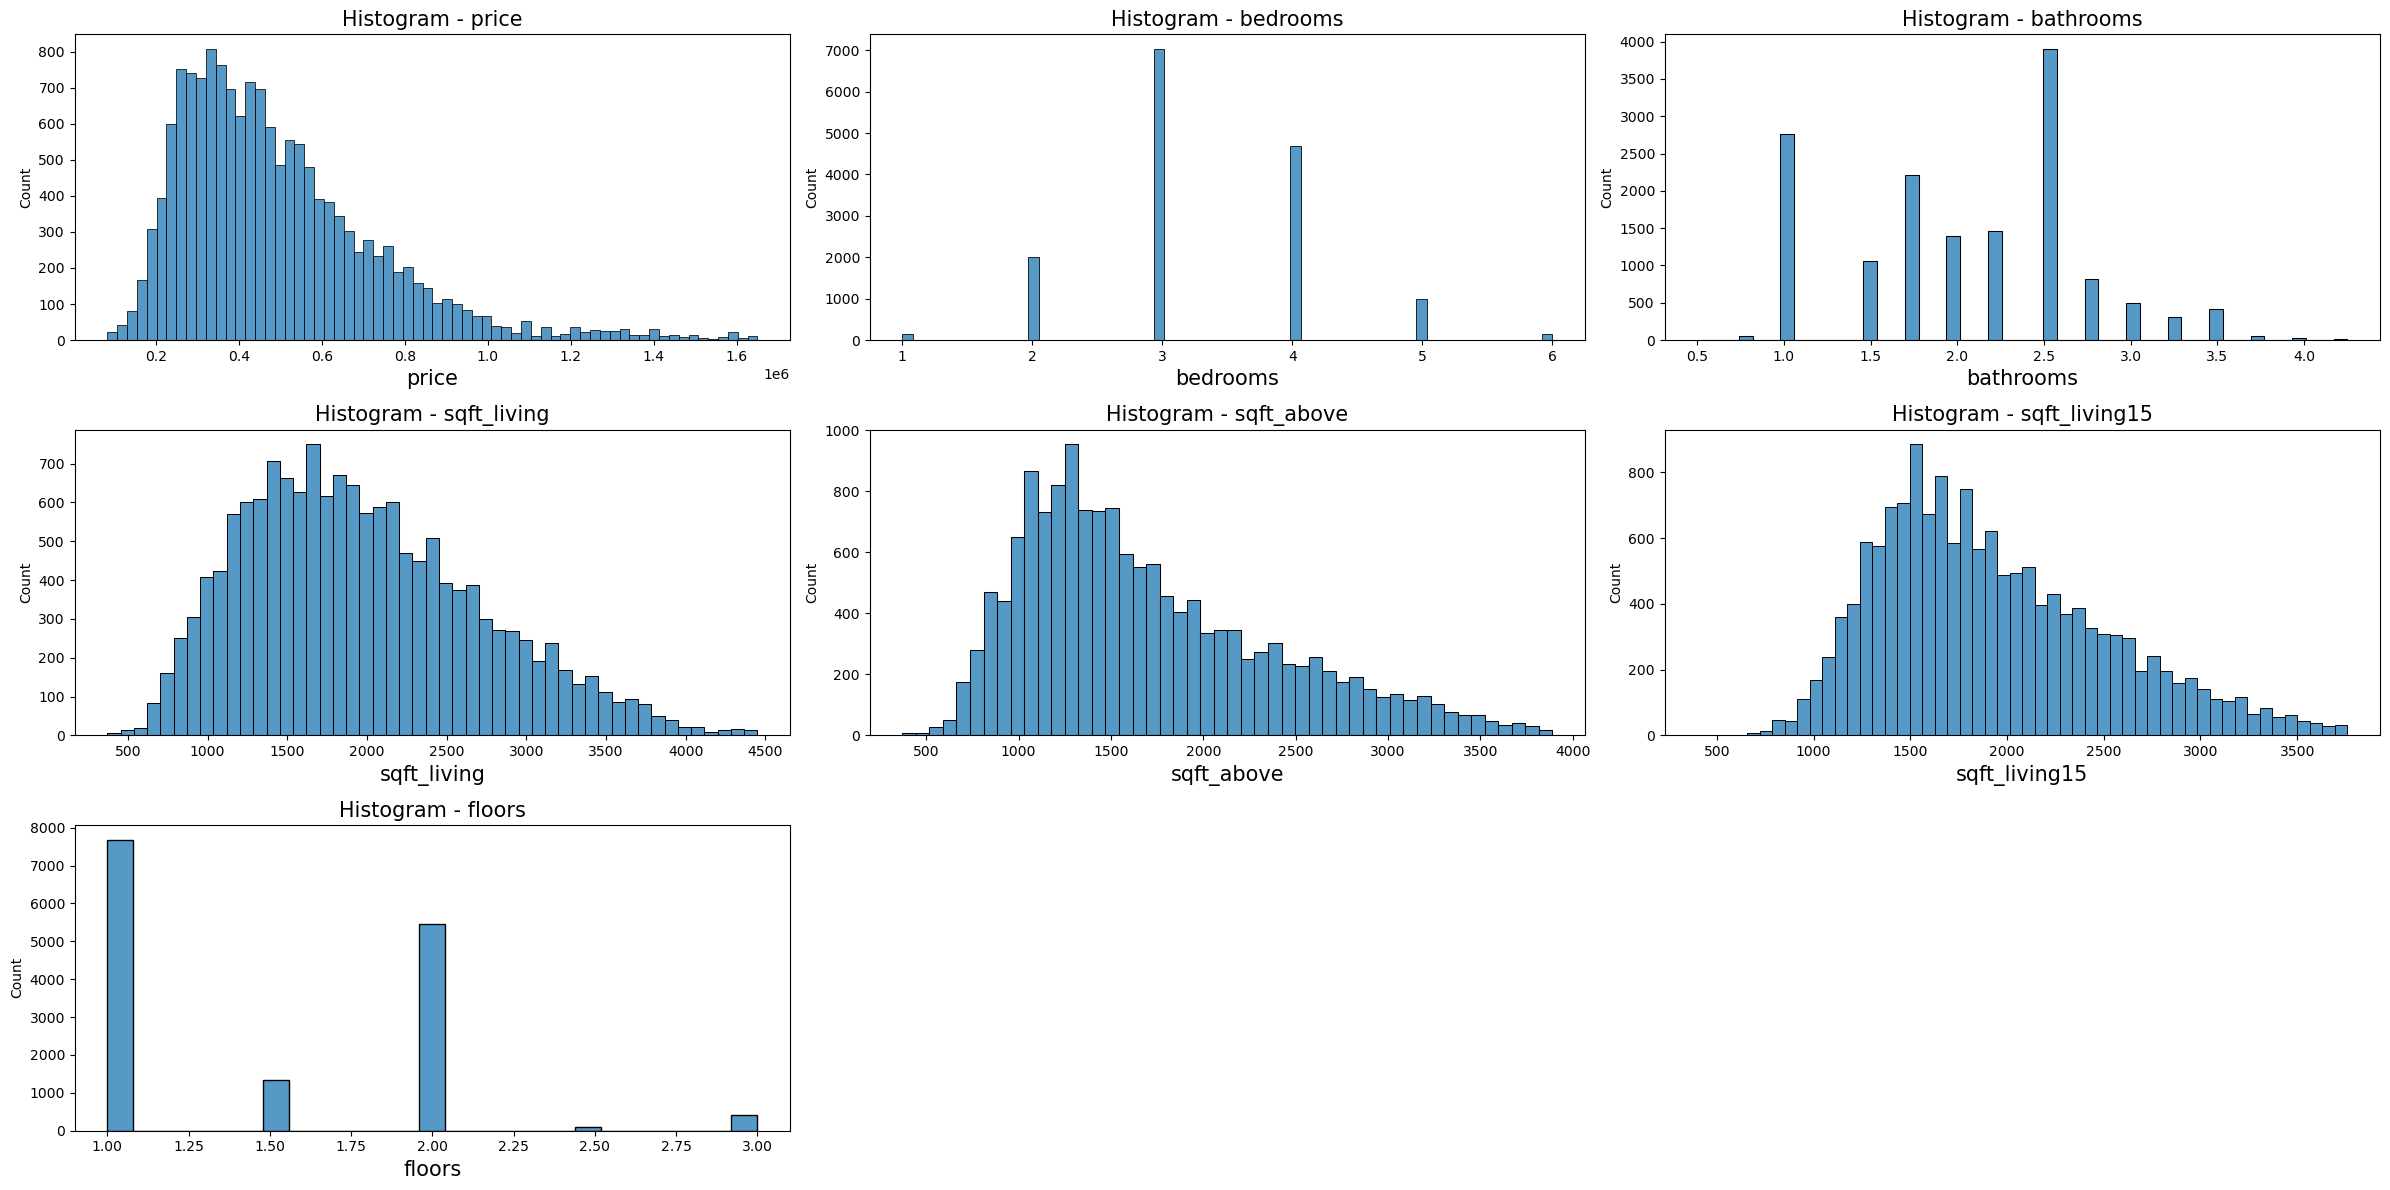

In [602]:
# Plotting histograms to check for the frequencies of the dataset after cleaning
# Define the columns for histograms
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above', 'sqft_living15','floors']

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(24, 4*n_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate histograms for each column
for i, column in enumerate(columns):
    sns.histplot(data=data_subset[column], ax=axes[i])
    axes[i].set_title(f'Histogram - {column}', fontsize=15)
    axes[i].set_xlabel(column, fontsize=15)

# Remove any unused subplots
for j in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In [603]:
#A statistical view of skewness
data_subset.skew()

price            1.40
bedrooms         0.25
bathrooms        0.01
sqft_living      0.56
waterfront      14.98
sqft_above       0.86
sqft_living15    0.68
floors           0.68
zipcode          0.39
year             0.76
dtype: float64

# Categorical Variables

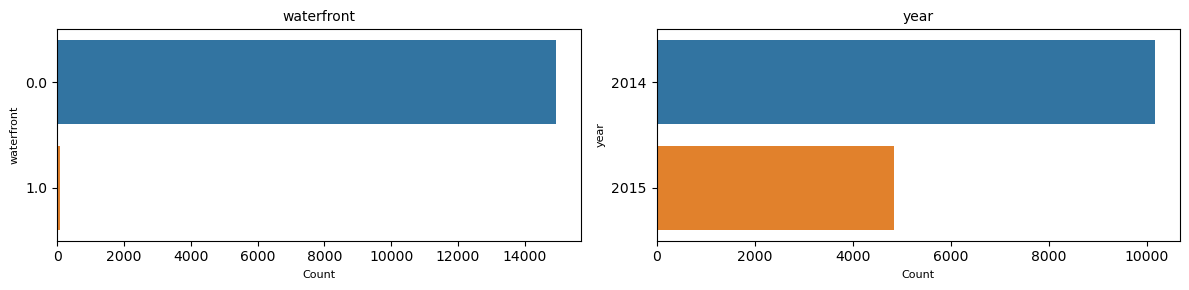

In [604]:
# Define the columns
columns = ['waterfront','year']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 3))

# Perform univariate analysis for each column
for i, column in enumerate(columns):
    counts = data_subset[column].value_counts().sort_values(ascending=False)
    sns.barplot(x=counts, y=counts.index, ax=axes[i], orient='h')
    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].set_xlabel('Count', fontsize=8)
    axes[i].set_ylabel(column, fontsize=8)

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In my initial univariate analysis, I utilized box plots to identify outliers across the features. I observed that all features displayed extreme values that could potentially distort the normal distribution of the data and undermine the accuracy of our predictive model. Consequently, I made the decision to remove these outliers.

Additionally, histograms were employed to examine the frequency distribution of the features and to visually assess any skewness in the data. Although histograms provide visual indications rather than precise measures of skewness, I noted that square footage of living space exhibited a somewhat normal distribution. Conversely, variables such as price, sqft_above, and sqft_living15 displayed positive skewness.

For categorical variables, bar plots were generated to gain insights into their distribution. The analysis revealed that the majority of houses lacked waterfronts, with only a small fraction having waterfront access. This aspect may influence housing prices and warrants further investigation in my analysis.

Regarding the temporal dimension represented by the 'year' variable, I observed a higher number of houses sold in 2014 compared to 2015. This temporal trend is noteworthy and will be considered in our subsequent analyses.

Bivariate Analysis

Numerical Variables

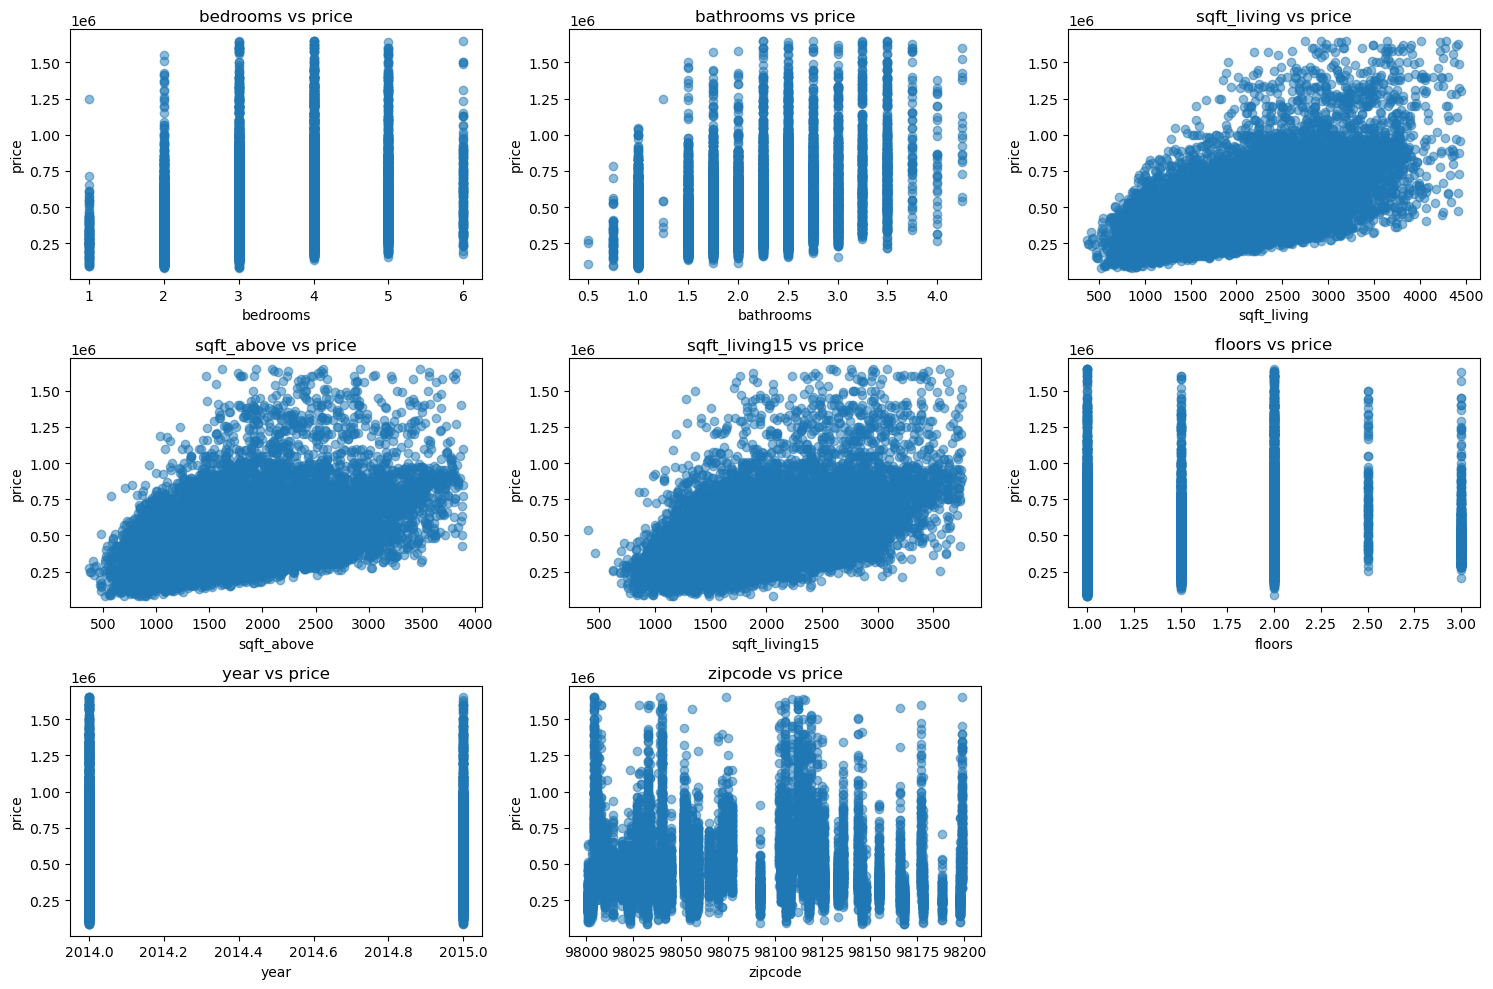

In [605]:
#for numeric values
# Select the desired features and the target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15','floors','year','zipcode']
target = 'price'

# Calculate the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 3

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting bivariate relationships
for i, feature in enumerate(features):
    axes[i].scatter(data_subset[feature], data_subset[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

# Remove any unused subplots
if len(features) < n_rows * n_cols:
    for j in range(len(features), n_rows * n_cols):
        fig.delaxes(axes[j])

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

Categorical variables

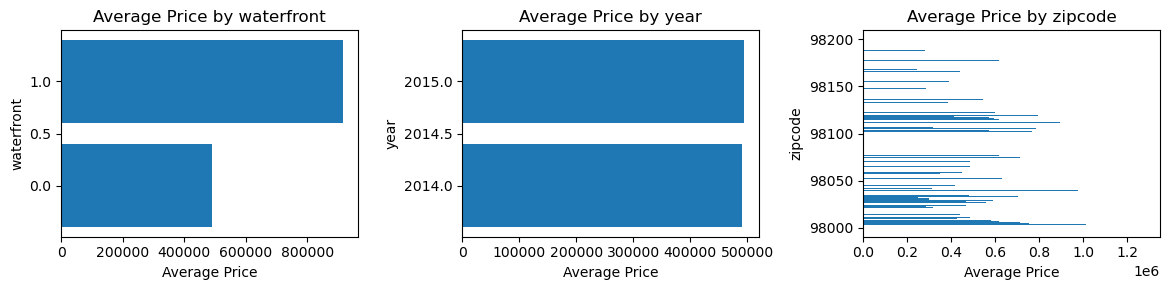

In [606]:
#categorical values against price
# Define the columns
columns = ['waterfront','year','zipcode']

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 3))

# Generate bar plots for each column
for i, column in enumerate(columns):
    grouped_data = data_subset.groupby(column)['price'].mean().sort_values(ascending=False)
    axes[i].barh(grouped_data.index, grouped_data.values)
    axes[i].set_xlabel('Average Price')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'Average Price by {column}')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plots
plt.show()

In the bivariate analysis, I utilized scatter plots to examine the relationships between numerical variables (such as bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, floors, year, and zipcode) and housing prices. Each numerical variable demonstrated a distinct impact on house pricing based on our observations.

Additionally, bar plots were employed to investigate the relationships between categorical variables (waterfront, year built, and zipcode) and housing prices. These plots illustrated how each categorical value influences house prices individually.

# Modelling

Model 1
Simple linear regression
For the baseline model I chose square foot living as the predictor variable because it has the highst correlation at 0.71.

In [607]:
y = data_subset["price"]
X_baseline = data_subset[["sqft_living"]]

In [608]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     9312.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:38:18   Log-Likelihood:            -2.0366e+05
No. Observations:               15001   AIC:                         4.073e+05
Df Residuals:                   14999   BIC:                         4.073e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         9.07e+04   4440.202     20.428      


R-squared value is 0.383, indicating that approximately 38.3% of the variance in the price can be explained by the sqft_living variable

The coefficient for "const" is 9.07e+04, and the coefficient for "sqft_living" is 203.9041. These values indicate that, on average, for each additional square foot of living space, the predicted price increases by approximately 203.9041 units.

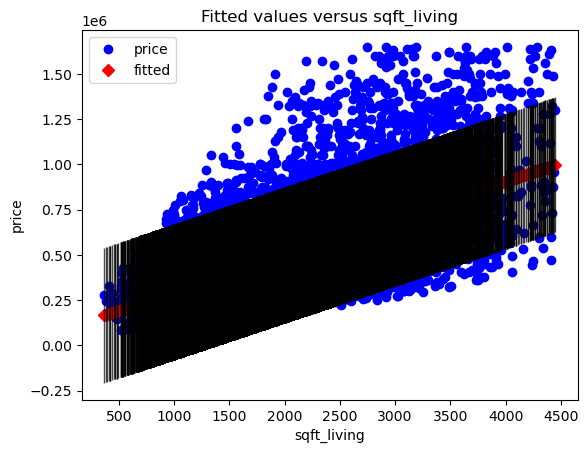

In [609]:
#Plotting the fit of the baseline model on the "sqft_living" feature
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

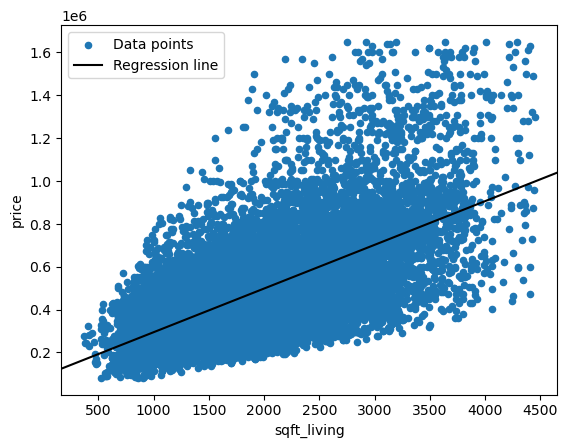

In [610]:
# Line of best fit
fig, ax = plt.subplots()
data_subset.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

Text(0, 0.5, 'residuals')

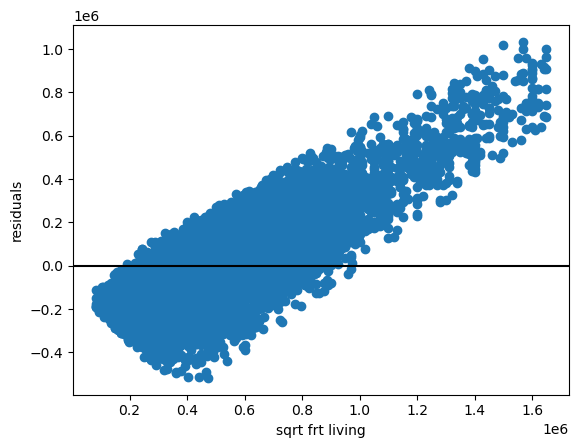

In [611]:
# Checking for residuals
fig, ax = plt.subplots()
ax.scatter(data_subset["price"], baseline_results.resid)
ax.axhline(y=0,color = "black")
ax.set_xlabel("sqrt frt living")
ax.set_ylabel("residuals")